# 案例分析(1) —— 微信好友数据分析

# 1、微信 (WeChat)

## 1.1 简介

- 出品公司
    - 腾讯
- 推出时间
    - 2011 年 1 月 21 日
- 功能
    - 为智能终端提供即时通讯服务
- 研发团队
    - [张小龙](https://baike.baidu.com/item/张小龙/24795?fr=aladdin) 团队

## 1.2 地位

- 截止到 2016 年第二季度
    - 覆盖中国 **94%** 以上的智能手机
    - 月活跃用户达到 **8.06** 亿
    - 用户覆盖 **200** 多个国家、超过 **20** 种语言
    - 各品牌的微信公众账号总数已经超过 **800** 万个
    - 移动应用对接数量超过 **85000** 个
    - 广告收入增至 **36.79** 亿人民币
    - 微信支付用户达到了 **4** 亿左右

- 用户
    - 社交必备

## 1.3 好友数据

- 古语云："观其友而知其人"
- 我们交了什么样的微信好友？

# 2、微信好友数据分析

## 2.1 所需模块功能简介

#### (1) itchat
- [itchat](https://itchat.readthedocs.io/zh/latest/) 是一个开源的微信个人号接口
- 功能
    - 网页版微信
    - 自动回复
    - 下载和发送附件
    - 等等
- 安装 
    - pip install itchat

#### (2) wordcloud
- 词云生成器
- 安装
    - pip install wordcloud

#### (3) jieba
- 最好的中文分词组件
- 安装
    - pip install jieba

#### (4) snownlp
- 中文分词、情感分析、文本分类等
- 用于自然语言处理（NLP）
- 安装
    - pip install snownlp

#### (5) TencentYoutuyun
- 腾讯优图，用于人脸识别等功能
- 感兴趣的同学可登录官网自行研究
    - [申请公有云服务](https://open.youtu.qq.com/#/open/application/all)
    - [阅读 Github 上的 ReadMe 文件](https://github.com/Tencent-YouTu/Python_sdk )
    - 阅读源代码
    - 等等
- 安装：分两步
    - ① 下载 https://github.com/Tencent-YouTu/Python_sdk 
        - clone or download - Download ZIP
        - 下载到某个目录下，得到 Python_sdk-master.zip
    - ② 在该目录下
        - pip install Python_sdk-master.zip

#### (6) pyecharts
- 位置分析，地图绘图
- 安装
    - pip install pyecharts
    - pip install echarts-countries-pypkg
        - 全球国家地图
    - pip install echarts-china-provinces-pypkg
        - 中国省级地图
    - pip install echarts-china-cities-pypkg
        - 中国市级地图

#### (7) tqdm
- 循环进度查看
- 安装
    - pip install tqdm

## 2.2 导入模块

- Anaconda 自带
    - os
    - collections
    - numpy
    - matplotlib
    - time
    - re
    - PIL
- 需要安装
    - itchat
    - wordcloud
    - jieba
    - snownlp
    - TencentYoutuyun

In [1]:
import os
import re
import time
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import itchat
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from tqdm import tqdm_notebook
import jieba
import jieba.analyse
import snownlp
import TencentYoutuyun
from pyecharts.charts import Map
from pyecharts import options as opts

## 2.3 字体设置

- 为了使 matplotlib 绘图时可以显示中文
    - 不设置会怎样？建议同学们尝试

In [2]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

## 2.4 登录微信，获取好友数据

- 扫二维码登录微信（相当于网页版微信）
- 获取好友信息
- 登录
    - 第一次扫二维码，生成 itchat.pkl 缓存文件
    - 之后一定时间内只需要在手机上确认登录即可，不需要扫二维码

In [3]:
itchat.auto_login(hotReload=True)
friends = itchat.get_friends(update=True)

Please press confirm on your phone.
Loading the contact, this may take a little while.
Login successfully as 荷树爸🌴🌼


#### (1) friends
- ContactList 类
- 利用索引，可以查看每一个好友

In [4]:
type(friends)


itchat.storage.templates.ContactList

In [5]:
friends

<ContactList: [<User: {'MemberList': <ContactList: []>, 'UserName': '@a4515582e351ff412c7e46523dc39d0b14a884570af462004df038da3a72c54b', 'City': '杨浦', 'DisplayName': '', 'PYQuanPin': 'heshubaspanclassemojiemoji1f334spanspanclassemojiemoji1f33cspan', 'RemarkPYInitial': '', 'Province': '上海', 'KeyWord': '', 'RemarkName': '', 'PYInitial': 'HSBSPANCLASSEMOJIEMOJI1F334SPANSPANCLASSEMOJIEMOJI1F33CSPAN', 'EncryChatRoomId': '', 'Alias': '', 'Signature': '', 'NickName': '荷树爸🌴🌼', 'RemarkPYQuanPin': '', 'HeadImgUrl': '/cgi-bin/mmwebwx-bin/webwxgeticon?seq=699138799&username=@a4515582e351ff412c7e46523dc39d0b14a884570af462004df038da3a72c54b&skey=@crypt_5d44caab_8ee779516ebeac2245b37880a3970485', 'UniFriend': 0, 'Sex': 1, 'AppAccountFlag': 0, 'VerifyFlag': 0, 'ChatRoomId': 0, 'HideInputBarFlag': 0, 'AttrStatus': 33554853, 'SnsFlag': 17, 'MemberCount': 0, 'OwnerUin': 0, 'ContactFlag': 3, 'Uin': 1229968461, 'StarFriend': 0, 'Statues': 0, 'WebWxPluginSwitch': 0, 'HeadImgFlag': 1, 'IsOwner': 0}>, <User: 

#### (2) 好友 0 和好友 1

In [6]:
friends[0]  # 第一个 friends 是自己

<User: {'MemberList': <ContactList: []>, 'UserName': '@a4515582e351ff412c7e46523dc39d0b14a884570af462004df038da3a72c54b', 'City': '杨浦', 'DisplayName': '', 'PYQuanPin': 'heshubaspanclassemojiemoji1f334spanspanclassemojiemoji1f33cspan', 'RemarkPYInitial': '', 'Province': '上海', 'KeyWord': '', 'RemarkName': '', 'PYInitial': 'HSBSPANCLASSEMOJIEMOJI1F334SPANSPANCLASSEMOJIEMOJI1F33CSPAN', 'EncryChatRoomId': '', 'Alias': '', 'Signature': '', 'NickName': '荷树爸🌴🌼', 'RemarkPYQuanPin': '', 'HeadImgUrl': '/cgi-bin/mmwebwx-bin/webwxgeticon?seq=699138799&username=@a4515582e351ff412c7e46523dc39d0b14a884570af462004df038da3a72c54b&skey=@crypt_5d44caab_8ee779516ebeac2245b37880a3970485', 'UniFriend': 0, 'Sex': 1, 'AppAccountFlag': 0, 'VerifyFlag': 0, 'ChatRoomId': 0, 'HideInputBarFlag': 0, 'AttrStatus': 33554853, 'SnsFlag': 17, 'MemberCount': 0, 'OwnerUin': 0, 'ContactFlag': 3, 'Uin': 1229968461, 'StarFriend': 0, 'Statues': 0, 'WebWxPluginSwitch': 0, 'HeadImgFlag': 1, 'IsOwner': 0}>

In [8]:
friends[1] #最近一次跟自己联系的人

<User: {'MemberList': <ContactList: []>, 'Uin': 0, 'UserName': '@4a449c0b66ccc5734eb4520715fc5b0471050a703b772c2fefa93bab54f194d4', 'NickName': '艾辉林', 'HeadImgUrl': '/cgi-bin/mmwebwx-bin/webwxgeticon?seq=682721226&username=@4a449c0b66ccc5734eb4520715fc5b0471050a703b772c2fefa93bab54f194d4&skey=@crypt_5d44caab_8ee779516ebeac2245b37880a3970485', 'ContactFlag': 3, 'MemberCount': 0, 'RemarkName': '', 'HideInputBarFlag': 0, 'Sex': 1, 'Signature': '', 'VerifyFlag': 0, 'OwnerUin': 0, 'PYInitial': 'AHL', 'PYQuanPin': 'aihuilin', 'RemarkPYInitial': '', 'RemarkPYQuanPin': '', 'StarFriend': 0, 'AppAccountFlag': 0, 'Statues': 0, 'AttrStatus': 33558631, 'Province': '上海', 'City': '闸北', 'Alias': '', 'SnsFlag': 16, 'UniFriend': 0, 'DisplayName': '', 'ChatRoomId': 0, 'KeyWord': '', 'EncryChatRoomId': '', 'IsOwner': 0}>

In [26]:
for key,values in friends[666].items():
    print('key = {}\tvalues={}'.format(key,values ))

key = MemberList	values=[]
key = Uin	values=0
key = UserName	values=@5dc19cfc251ac8c42ae18857260423794bb0ec6c5fea2d8e25c6c69c90038c55
key = NickName	values=茶水博士
key = HeadImgUrl	values=/cgi-bin/mmwebwx-bin/webwxgeticon?seq=682888457&username=@5dc19cfc251ac8c42ae18857260423794bb0ec6c5fea2d8e25c6c69c90038c55&skey=@crypt_5d44caab_8ee779516ebeac2245b37880a3970485
key = ContactFlag	values=3
key = MemberCount	values=0
key = RemarkName	values=马险峰
key = HideInputBarFlag	values=0
key = Sex	values=1
key = Signature	values=学而不思则罔，思而不学则殆
key = VerifyFlag	values=0
key = OwnerUin	values=0
key = PYInitial	values=CSBS
key = PYQuanPin	values=chashuiboshi
key = RemarkPYInitial	values=MXF
key = RemarkPYQuanPin	values=maxianfeng
key = StarFriend	values=0
key = AppAccountFlag	values=0
key = Statues	values=0
key = AttrStatus	values=102437
key = Province	values=上海
key = City	values=杨浦
key = Alias	values=
key = SnsFlag	values=49
key = UniFriend	values=0
key = DisplayName	values=
key = ChatRoomId	values=0
key 

#### (3) 好友数量查看

In [27]:
print("好友数量为：", len(friends)-1)

好友数量为： 1404


## 2.5 好友性别分析

#### (1) 收集性别数据
- `Sex` 关键字
    - 0：保密
    - 1：男
    - 2：女
- map 内置函数

In [28]:
sexs = list(map(lambda x: x['Sex'], friends[1:]))  # 注意不要把自己包括进去
sexs[:25]  # 看前 25 个好友的性别   0  1  2，

[1, 2, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1]

#### (2) 统计不同性别的数量

In [29]:
counts = sexs.count(0), sexs.count(1), sexs.count(2)  # 分别统计保密、男、女的数量
counts

(160, 942, 302)

#### (3) 绘图 —— 可视化
- 饼图
    - 标签 labels
    - 颜色 colors
    - 图例 legend
    - 标题 title

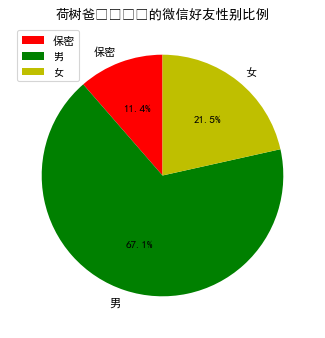

In [30]:
plt.figure(figsize=(8, 5), dpi=80)
plt.axes(aspect=1)  # aspect=1表示正圆，取不同的值，表示的圆形状不同
plt.pie(counts, 
        labels=['保密', '男', '女'],  # 性别展示标签
        colors=['r', 'g', 'y'],       # 饼图区域配色
        labeldistance=1.1,            # 标签距离圆点距离
        autopct='%3.1f%%',            # 饼图区域文本格式
        shadow=False,                 # 饼图是否显示阴影
        startangle=90,                # 饼图起始角度
        pctdistance=0.6)              # 饼图区域文本距离圆点距离
plt.legend(loc='upper left')          # 标签位置
plt.title("{}的微信好友性别比例".format(friends[0]['NickName']))
plt.show()

#### (4) 数据分析

- 男女好友比例严重失衡......说明什么问题
- 等等

## 2.6 头像分析

- 头像是否是人脸
    - 使用腾讯优图提供的人脸识别 API
    - 需要注册账号、业务申请
        - [腾讯优图·开发者中心](https://open.youtu.qq.com/#/open/developer/join)
    - 两个工作日内有答复
        - 审核通过后，得到密钥，包含：AppID、SecretID和SecretKey
- 头像标签的词云

#### (1) 创建头像存储的文件夹

In [32]:
basePath = os.path.abspath('.')           # 程序的存储位置
baseFolder = basePath + '\\HeadImages\\'  # 创建存储图片的文件夹的位置
if (os.path.exists(baseFolder) == False):
    os.makedirs(baseFolder)
else:
    pass

In [31]:
dir(os)

['DirEntry',
 'F_OK',
 'MutableMapping',
 'O_APPEND',
 'O_BINARY',
 'O_CREAT',
 'O_EXCL',
 'O_NOINHERIT',
 'O_RANDOM',
 'O_RDONLY',
 'O_RDWR',
 'O_SEQUENTIAL',
 'O_SHORT_LIVED',
 'O_TEMPORARY',
 'O_TEXT',
 'O_TRUNC',
 'O_WRONLY',
 'P_DETACH',
 'P_NOWAIT',
 'P_NOWAITO',
 'P_OVERLAY',
 'P_WAIT',
 'PathLike',
 'R_OK',
 'SEEK_CUR',
 'SEEK_END',
 'SEEK_SET',
 'TMP_MAX',
 'W_OK',
 'X_OK',
 '_Environ',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_execvpe',
 '_exists',
 '_exit',
 '_fspath',
 '_get_exports_list',
 '_putenv',
 '_unsetenv',
 '_wrap_close',
 'abc',
 'abort',
 'access',
 'altsep',
 'chdir',
 'chmod',
 'close',
 'closerange',
 'cpu_count',
 'curdir',
 'defpath',
 'device_encoding',
 'devnull',
 'dup',
 'dup2',
 'environ',
 'error',
 'execl',
 'execle',
 'execlp',
 'execlpe',
 'execv',
 'execve',
 'execvp',
 'execvpe',
 'extsep',
 'fdopen',
 'fsdecode',
 'fsencode',
 'fspath',
 'fstat',
 'fsync',
 'ft

#### (2) 准备工作
- 密钥
- YouTu 对象
- 计数器和标签

In [1]:
#此处要申请
appID =                                  # 你的 AppID
secretID =    # 你的 SecretID
secretKey =       # 你的 SecretKey
userid=                                # 你的 UserId

SyntaxError: invalid syntax (<ipython-input-1-65b31d514230>, line 2)

In [34]:
endPoint = TencentYoutuyun.conf.API_YOUTU_END_POINT
youtu = TencentYoutuyun.YouTu(appID, secretID, secretKey, userid, endPoint)

In [36]:
countFace = 0     # 使用人脸的数量
countNonFace = 0  # 未使用人脸的数量
imageTags = ""    # 图片的标签

#### (3) 头像检测
- 人脸检测
- 人脸/非人脸计数
- 标签词云

In [ ]:
#friends = friends[1:50]    #降低分析量

In [37]:
for index in tqdm_notebook(range(1, len(friends))):
    friend = friends[index]
    # 保存头像文件
    imgFile = baseFolder + 'Image{}.jpg'.format(index)
    imgData = itchat.get_head_img(userName=friend['UserName'])
    if os.path.exists(imgFile) == False:
        with open(imgFile, 'wb') as file:
            file.write(imgData)
#1404预计用时3-5min

In [38]:
len(friends)

1405

In [39]:
# 检测人脸 及 计数
errList = []
isface = []
ii = 0
for index in tqdm_notebook(range(1, len(friends))):
    ii = ii+1
    print(ii,end = ' ');
    if(ii%10==0):
        print('\n')
    imgFile = baseFolder + 'Image{}.jpg'.format(index)
    try:
        faceRes = youtu.DetectFace(imgFile)  # 调用 DetectFace 接口，检测图像是否含有人脸
        if faceRes['face']:
            countFace += 1
            isface.append(1)
        else:
            countNonFace += 1
            isface.append(0)
    except:
        errList.append(index)
#0:13 - 1:18 用时1小时05分  god

1 2 3 4 5 6 7 8 9 10 

11 12 13 14 15 16 17 18 19 20 

21 22 23 24 25 26 27 28 29 30 

31 32 33 34 35 36 37 38 39 40 

41 42 43 44 45 46 47 48 49 50 

51 52 53 54 55 56 57 58 59 60 

61 62 63 64 65 66 67 68 69 70 

71 72 73 74 75 76 77 78 79 80 

81 82 83 84 85 86 87 88 89 90 

91 92 93 94 95 96 97 98 99 100 

101 102 103 104 105 106 107 108 109 110 

111 112 113 114 115 116 117 118 119 120 

121 122 123 124 125 126 127 128 129 130 

131 132 133 134 135 136 137 138 139 140 

141 142 143 144 145 146 147 148 149 150 

151 152 153 154 155 156 157 158 159 160 

161 162 163 164 165 166 167 168 169 170 

171 172 173 174 175 176 177 178 179 180 

181 182 183 184 185 186 187 188 189 190 

191 192 193 194 195 196 197 198 199 200 

201 202 203 204 205 206 207 208 209 210 

211 212 213 214 215 216 217 218 219 220 

221 222 223 224 225 226 227 228 229 230 

231 232 233 234 235 236 237 238 239 240 

241 242 243 244 245 246 247 248 249 250 

251 252 253 254 255 256 257 258 259 260 

261 262 263 264 

In [40]:
countFace, countNonFace
#496， 908

(496, 908)

In [41]:
cc = 0
for each in isface:
    print(each,end='  ')
    cc = cc + 1
    if(cc%10 == 0):
        #print('\n')

1  0  1  0  0  1  1  0  0  0  

0  1  0  0  0  1  1  0  0  0  

0  0  0  0  1  0  0  0  0  0  

0  1  0  0  1  0  1  0  1  1  

0  0  1  0  0  1  1  0  0  1  

1  0  1  0  1  1  0  0  1  1  

0  1  1  0  0  0  0  0  0  1  

0  0  0  0  0  0  1  0  0  1  

1  1  1  1  1  0  0  0  0  0  

1  1  0  0  1  1  1  1  0  0  

0  1  1  0  0  0  0  0  0  0  

0  0  0  0  0  1  0  0  0  0  

0  1  0  1  1  1  1  1  0  1  

0  1  0  0  1  0  1  0  1  1  

0  0  0  0  0  0  0  1  0  0  

1  1  1  0  1  0  0  0  1  0  

1  0  1  1  0  1  0  0  0  1  

0  0  1  1  0  0  0  1  1  0  

1  0  1  0  0  0  0  0  0  1  

0  0  0  0  0  0  0  0  0  0  

1  1  0  1  0  1  0  1  1  1  

0  1  0  0  1  1  0  0  0  0  

0  0  0  0  0  1  0  0  1  1  

0  1  0  0  0  0  0  0  1  0  

0  0  0  0  0  1  0  1  0  1  

0  1  0  0  0  0  1  1  0  0  

1  1  0  1  0  1  0  0  0  0  

1  0  0  0  0  0  0  1  0  1  

0  1  1  0  1  0  1  0  0  1  

0  0  1  0  0  1  0  0  0  0  

0  1  1  0  1  0  0  0  0  1  

1  1  0 

In [64]:
# 检测图像标签
# 预计用时2-3分钟（50人）

for index in tqdm_notebook(range(1, len(friends))):
    # 头像分类，做词云
    tagRes = youtu.imagetag(imgFile)  # 调用 imagetag 接口，检测图像的标签
    #result = faceApi.extractTags(imgFile)
#    imageTags += (','.join(list(map(lambda x:x['tag_name'], tagRes['tags'])))+',')  # 将标签文件连接到一起
    imageTags  +=  ','.join(list(map(lambda x:x['tag_name'], tagRes['tags'])))  # 将标签文件连接到一起
  ##image_tags +=  ','.join(list(map(lambda x:x[‘tag_name’],result)))
#1:19-1:30  用时11分钟

In [ ]:
#imagetag 获得图像的标签

#### (4) 绘图 —— 饼图
- 是否使用人脸

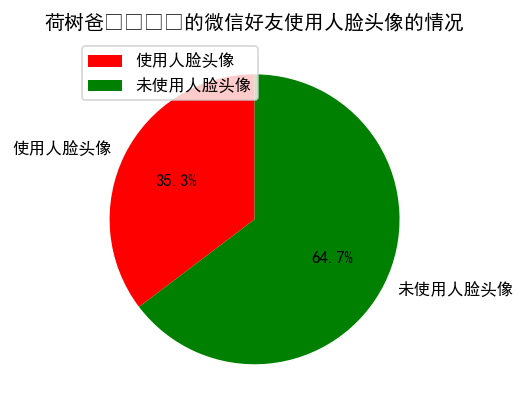

In [65]:
labels = ['使用人脸头像', '未使用人脸头像']
counts = (countFace, countNonFace)
colors = ['red', 'green']

plt.figure(figsize=(6,4), dpi=120)
plt.axes(aspect=1)
plt.pie(counts,
        labels=labels,
        colors=colors,
        labeldistance=1.1,
        autopct='%3.1f%%',
        shadow=False,
        startangle=90,
        pctdistance=0.6)
plt.legend(loc='upper left')       
plt.title('{}的微信好友使用人脸头像的情况'.format(friends[0]['NickName']))
plt.show()

<img src="images/0001.png" width = 400>  #原始数据

#### (5) 绘图 —— 词云图
- 头像标签词云

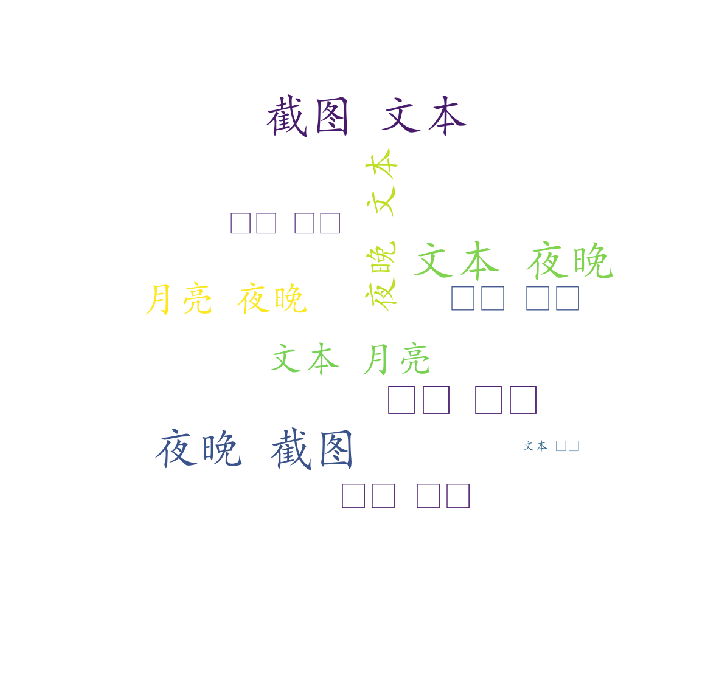

In [70]:
#imageTags = imageTags.encode('iso8859-1').decode('utf-8')  # 编码和解码
plt.figure(figsize=(8,5), dpi=160)
mask = np.array(Image.open('flower.jpg'))            # 词云的背景，大家可以自由发挥
wordcloud = WordCloud(font_path='simkai.ttf',    # 字体：楷体
                      background_color='white',
                      mask=mask,
                      max_words=1200,
                      max_font_size=75,
                      random_state=45,
                      width=600,
                      height=300,
                      margin=15)
wordcloud.generate(imageTags)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [68]:
for each in imageTags:
    print(each,end=' ')

夜 晚 , 截 图 , 文 本 , 夜 晚 , 文 本 , 月 亮 , 夜 晚 , 截 图 , 文 本 , 夜 晚 , 文 本 , 月 亮 , 夜 晚 , 截 图 , 文 本 , 夜 晚 , 文 本 , 月 亮 , 夜 晚 , 文 本 , 月 亮 , 夜 晚 , 截 图 , 文 本 , 夜 晚 , 截 图 , 文 本 , 夜 晚 , 文 本 , 月 亮 , 夜 晚 , 截 图 , 文 本 , 夜 晚 , 截 图 , 文 本 , 夜 晚 , 文 本 , 月 亮 , 夜 晚 , 截 图 , 文 本 , 夜 晚 , 截 图 , 文 本 , 夜 晚 , 文 本 , 月 亮 , 夜 晚 , 文 本 , 月 亮 , 夜 晚 , 截 图 , 文 本 , 夜 晚 , 截 图 , 文 本 , 夜 晚 , 截 图 , 文 本 , 夜 晚 , 截 图 , 文 本 , 夜 晚 , 截 图 , 文 本 , 夜 晚 , 截 图 , 文 本 , 夜 晚 , 文 本 , 月 亮 , 夜 晚 , 文 本 , 月 亮 , 夜 晚 , 截 图 , 文 本 , 夜 晚 , 截 图 , 文 本 , 夜 晚 , 文 本 , 月 亮 , 夜 晚 , 截 图 , 文 本 , 夜 晚 , 截 图 , 文 本 , 夜 晚 , 文 本 , 月 亮 , 夜 晚 , 截 图 , 文 本 , 夜 晚 , 文 本 , 月 亮 , 夜 晚 , 截 图 , 文 本 , 夜 晚 , 文 本 , 月 亮 , 夜 晚 , 截 图 , 文 本 , 夜 晚 , 文 本 , 月 亮 , 夜 晚 , 截 图 , 文 本 , 夜 晚 , 文 本 , 月 亮 , 夜 晚 , 文 本 , 月 亮 , 夜 晚 , 截 图 , 文 本 , 夜 晚 , 文 本 , 月 亮 , 夜 晚 , 截 图 , 文 本 , 夜 晚 , 截 图 , 文 本 , 夜 晚 , 截 图 , 文 本 , 夜 晚 , 截 图 , 文 本 , 夜 晚 , 截 图 , 文 本 , 夜 晚 , 文 本 , 月 亮 , 夜 晚 , 文 本 , 月 亮 , 夜 晚 , 截 图 , 文 本 , 夜 晚 , 文 本 , 月 亮 , 夜 晚 , 文 本 , 月 亮 , 夜 晚 , 截 图 , 文 本 , 夜 晚 , 文 本 , 月 亮 , 夜 晚 , 截 图 , 文 本 , 夜 晚 , 文 本 

 , 截 图 , 文 本 , 夜 晚 , 截 图 , 文 本 , 夜 晚 , 截 图 , 文 本 , 夜 晚 , 截 图 , 文 本 , 夜 晚 , 截 图 , 文 本 , 夜 晚 , 文 本 , 月 亮 , 夜 晚 , 截 图 , 文 本 , 夜 晚 , 截 图 , 文 本 , 夜 晚 , 截 图 , 文 本 , 夜 晚 , 截 图 , 文 本 , 夜 晚 , 截 图 , 文 本 , 夜 晚 , 文 本 , 月 亮 , 夜 晚 , 文 本 , 月 亮 , 夜 晚 , 截 图 , 文 本 , 夜 晚 , 文 本 , 月 亮 , 夜 晚 , 文 本 , 月 亮 , 夜 晚 , 文 本 , 月 亮 , 夜 晚 , 文 本 , 月 亮 , 夜 晚 , 截 图 , 文 本 , 夜 晚 , 文 本 , 月 亮 , 夜 晚 , 截 图 , 文 本 , 夜 晚 , 截 图 , 文 本 , 夜 晚 , 文 本 , 月 亮 , 夜 晚 , 截 图 , 文 本 , 夜 晚 , 文 本 , 月 亮 , 夜 晚 , 文 本 , 月 亮 , 夜 晚 , 截 图 , 文 本 , 夜 晚 , 文 本 , 月 亮 , 夜 晚 , 截 图 , 文 本 , 夜 晚 , 文 本 , 月 亮 , 夜 晚 , 文 本 , 月 亮 , 夜 晚 , 截 图 , 文 本 , 夜 晚 , 截 图 , 文 本 , 夜 晚 , 文 本 , 月 亮 , 夜 晚 , 文 本 , 月 亮 , 夜 晚 , 文 本 , 月 亮 , 夜 晚 , 文 本 , 月 亮 , 夜 晚 , 文 本 , 月 亮 , 夜 晚 , 文 本 , 月 亮 , 夜 晚 , 截 图 , 文 本 , 夜 晚 , 文 本 , 月 亮 , 夜 晚 , 文 本 , 月 亮 , 夜 晚 , 文 本 , 月 亮 , 夜 晚 , 截 图 , 文 本 , 夜 晚 , 截 图 , 文 本 , 夜 晚 , 文 本 , 月 亮 , 夜 晚 , 截 图 , 文 本 , 夜 晚 , 文 本 , 月 亮 , 夜 晚 , 文 本 , 月 亮 , 夜 晚 , 截 图 , 文 本 , 夜 晚 , 截 图 , 文 本 , 夜 晚 , 文 本 , 月 亮 , 夜 晚 , 截 图 , 文 本 , 夜 晚 , 截 图 , 文 本 , 夜 晚 , 截 图 , 文 本 , 夜 晚 , 文 本 , 月

 晚 , 文 本 , 月 亮 , 夜 晚 , 截 图 , 文 本 , 夜 晚 , 截 图 , 文 本 , 夜 晚 , 文 本 , 月 亮 , 夜 晚 , 文 本 , 月 亮 , 夜 晚 , 截 图 , 文 本 , 夜 晚 , 截 图 , 文 本 , 夜 晚 , 截 图 , 文 本 , 夜 晚 , 截 图 , 文 本 , 夜 晚 , 截 图 , 文 本 , 夜 晚 , 文 本 , 月 亮 , 夜 晚 , 文 本 , 月 亮 , 夜 晚 , 截 图 , 文 本 , 夜 晚 , 文 本 , 月 亮 , 夜 晚 , 截 图 , 文 本 , 夜 晚 , 文 本 , 月 亮 , 夜 晚 , 文 本 , 月 亮 , 夜 晚 , 截 图 , 文 本 , 夜 晚 , 截 图 , 文 本 , 夜 晚 , 文 本 , 月 亮 , 夜 晚 , 截, 月 亮 , 夜 晚 , 文 本 , 月 亮 , 夜 晚 , 截 图 , 文 本 , 夜 晚 , 文 本 , 月 亮 , 夜 晚 , 截 图 , 文 本 , 夜 晚 , 文 本 , 月 亮 , 夜 晚 , 文 本 , 月 亮 , 夜 晚 , 截 图 , 文 本 , 夜 晚 , 文 本 , 月 亮 , 夜 晚 , 截 图 , 文 本 , 夜 晚 , 文 本 , 月 亮 , 夜 晚 , 截 图 , 文 本 , 夜 晚 , 文 本 , 月 亮 , 夜 晚 , 截 图 , 文 本 , 夜 晚 , 文 本 , 月 亮 , 夜 晚 , 截 图 , 文 本 , 夜 晚 , 截 图 , 文 本 , 夜 晚 , 截 图 , 文 本 , 夜 晚 , 文 本 , 月 亮 , 夜 晚 , 文 本 , 月 亮 , 夜 晚 , 截 图 , 文 本 , 夜 晚 , 截 图 , 文 本 , 夜 晚 , 截 图 , 文 本 , 夜 晚 , 文 本 , 月 亮 , 夜 晚 , 文 本 , 月 亮 , 夜 晚 , 截 图 , 文 本 , 夜 晚 , 截 图 , 文 本 , 夜 晚 , 文 本 , 月 亮 , 夜 晚 , 截 图 , 文 本 , 夜 晚 , 文 本 , 月 亮 , 夜 晚 , 截 图 , 文 本 , 夜 晚 , 文 本 , 月 亮 , 夜 晚 , 文 本 , 月 亮 , 夜 晚 , 文 本 , 月 亮 , 夜 晚 , 文 本 , 月 亮 , 夜 晚 , 截 图 , 文 

 ª å  ¾ , æ   æ  ¬ å ¤  æ   , æ   æ  ¬ , æ   ä º ® å ¤  æ   , æ  ª å  ¾ , æ   æ  ¬ å ¤  æ   , æ   æ  ¬ , æ   ä º ® å ¤  æ   , æ  ª å  ¾ , æ   æ  ¬ å ¤  æ   , æ  ª å  ¾ , æ   æ  ¬ å ¤  æ   , æ  ª å  ¾ , æ   æ  ¬ å ¤  æ   , æ  ª å  ¾ , æ   æ  ¬ å ¤  æ   , æ   æ  ¬ , æ   ä º ® å ¤  æ   , æ  ª å  ¾ , æ   æ  ¬ å ¤  æ   , æ   æ  ¬ , æ   ä º ® å ¤  æ   , æ   æ  ¬ , æ   ä º ® å ¤  æ   , æ  ª å  ¾ , æ   æ  ¬ å ¤  æ   , æ  ª å  ¾ , æ   æ  ¬ å ¤  æ   , æ  ª å  ¾ , æ   æ  ¬ å ¤  æ   , æ   æ  ¬ , æ   ä º ® å ¤  æ   , æ   æ  ¬ , æ   ä º ® å ¤  æ å ¤  æ   , æ  ª å  ¾ , æ   æ  ¬ å ¤  æ   , æ   æ  ¬ , æ   ä º ® å ¤  æ   , æ  ª å  ¾ , æ   æ  ¬ å ¤  æ   , æ   æ  ¬ , æ   ä º ® å ¤  æ   , æ  ª å  ¾ , æ   æ  ¬ å ¤  æ   , æ  ª å  ¾ , æ   æ  ¬ å ¤  æ   , æ   æ  ¬ , æ   ä º ® å ¤  æ   , æ  ª å  ¾ , æ   æ  ¬ å ¤  æ

  ä º ® å ¤  æ   , æ   æ  ¬ , æ   ä º ® å ¤  æ   , æ   æ  ¬ , æ   ä º ® å ¤  æ   , æ  ª å  ¾ , æ   æ  ¬ å ¤  æ   , æ  ª å  ¾ , æ   æ  ¬ å ¤  æ   , æ   æ  ¬ , æ   ä º ® å ¤  æ   , æ   æ  ¬ , æ   ä º ® å ¤  æ   , æ   æ  ¬ , æ   ä º ® å ¤  æ   , æ   æ  ¬ , æ   ä º ® å ¤  æ   , æ  ª å  ¾ , æ   æ  ¬ å ¤  æ   , æ   æ  ¬ , æ   ä º ® å ¤  æ   , æ  ª å  ¾ , æ   æ  ¬ å ¤  æ   , æ   æ  ¬ , æ   ä º ® å ¤  æ   , æ  ª å  ¾ , æ   æ  ¬ å ¤  æ   , æ  ª å  ¾ , æ   æ  ¬ å ¤  æ   , æ   æ  ¬ , æ   ä º ® å ¤  æ   , æ  ª å  ¾ , æ   æ  ¬ å ¤  æ   , æ  ª å  ¾ , æ   æ  ¬ å ¤  æ   , æ   æ  ¬ , æ   ä º ® å ¤  æ   , æ  ª å  ¾ , æ   æ  ¬ å ¤  æ   , æ  ª å  ¾ , æ   æ  ¬ å ¤  æ   , æ  ª å  ¾ , æ   æ  ¬ å ¤  æ   , æ   æ  ¬ , æ   ä º ® å ¤  æ   , æ   æ  ¬ , æ   ä º ® å ¤  æ   , æ  ª å  ¾ , æ   æ  ¬ å ¤  æ   , æ   æ  ¬ , æ 

   æ  ¬ å ¤  æ   , æ  ª å  ¾ , æ   æ  ¬ å ¤  æ   , æ   æ  ¬ , æ   ä º ® å ¤  æ   , æ  ª å  ¾ , æ   æ  ¬ å ¤  æ   , æ   æ  ¬ , æ   ä º ® å ¤  æ   , æ  ª å  ¾ , æ   æ  ¬ å ¤  æ   , æ  ª å  ¾ , æ   æ  ¬ å ¤  æ   , æ  ª å  ¾ , æ   æ  ¬ å ¤  æ   , æ  ª å  ¾ , æ   æ  ¬ å ¤  æ   , æ   æ  ¬ , æ   ä º ® å ¤  æ   , æ   æ  ¬ , æ   ä º ® å ¤  æ   , æ  ª å  ¾ , æ   æ  ¬ å ¤  æ   , æ  ª å  ¾ , æ   æ  ¬ å ¤  æ   , æ  ª å  ¾ , æ   æ  ¬ å ¤  æ   , æ  ª å  ¾ , æ   æ  ¬ å ¤  æ   , æ  ª å  ¾ , æ   æ  ¬ å ¤  æ   , æ  ª å  ¾ , æ   æ  ¬ å ¤  æ   , æ  ª å  ¾ , æ   æ  ¬ å ¤  æ   , æ  ª å  ¾ , æ   æ  ¬ å ¤  æ   , æ   æ  ¬ , æ   ä º ® å ¤  æ   , æ   æ  ¬ å ¤  æ   , æ   æ  ¬ , æ   ä º ® å ¤  æ   , æ  ª å  ¾ , æ   æ  ¬ å ¤  æ   , æ  ª å  ¾ , æ   æ  ¬ å ¤  æ   , æ  ª å  ¾ , æ   æ  ¬ å ¤  æ   , æ   æ  ¬ , æ   ä º ® å ¤

æ   , æ  ª å  ¾ , æ   æ  ¬ å ¤  æ   , æ   æ  ¬ , æ   ä º ® å ¤  æ   , æ  ª å  ¾ , æ   æ  ¬ å ¤  æ   , æ   æ  ¬ , æ   ä º ® å ¤  æ   , æ   æ  ¬ , æ   ä º ® å ¤  æ   , æ   æ  ¬ , æ   ä º ® å ¤  æ   , æ   æ  ¬ , æ   ä º ® å ¤  æ   , æ  ª å  ¾ , æ   æ  ¬ å ¤  æ   , æ  ª å  ¾ , æ   æ  ¬ å ¤  æ   , æ  ª å  ¾ , æ   æ  ¬ å ¤  æ   , æ   æ  ¬ , æ   ä º ® å ¤  æ   , æ   æ  ¬ , æ   ä º ® å ¤  æ   , æ  ª å  ¾ , æ   æ  ¬ å ¤  æ   , æ   æ  ¬ , æ   ä º ® å ¤  æ   , æ   æ  ¬ , æ   ä º ® æ  ¬ , æ   ä º ® å ¤  æ   , æ   æ  ¬ , æ   ä º ® å ¤  æ   , æ  ª å  ¾ , æ   æ  ¬ å ¤  æ   , æ  ª å  ¾ , æ   æ  ¬ å ¤  æ   , æ  ª å  ¾ , æ   æ  ¬ å ¤  æ   , æ   æ  ¬ , æ   ä º ® å ¤  æ   , æ   æ  ¬ , æ   ä º ® å ¤  æ   , æ  ª å  ¾ , æ   æ  ¬ å ¤  æ   , æ  ª å  ¾ , æ   æ  ¬ å ¤  æ   , æ   æ  ¬ , æ   ä º ® å ¤  æ   , æ  ª å  ¾ 

<img src="images/0002.png" width=400>

#### (6) 数据分析

- 大部分人还是没有使用人脸头像的
- 文本、月亮、截图

## 2.7 签名分析

#### (1) 签名的分词和情感检测
- 签名提取
    - 筛选
        - 去除首位的空格
        - 去除无关词：比如 emoji
        - 其他无关词（可通过查看 `Signature` 的特点，自行确定）
- jieba
    - 分词
- SnowNLP
    - 情感检测

In [71]:
signatures = ""
emotions = []
for friend in friends:
    signat = friend.get('Signature')
    if signat != None:
        signat = signat.strip().replace("emoji","")
    if len(signat) > 0:
        nlp = snownlp.SnowNLP(signat)
        emotions.append(nlp.sentiments)  # nlp.sentiments: 权值，代表情感的积极程度
        signatures += " ".join(jieba.analyse.extract_tags(signat, 5))  # 关键字提取

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\rjma\AppData\Local\Temp\jieba.cache
Loading model cost 1.229 seconds.
Prefix dict has been built succesfully.


#### (2) 词云图

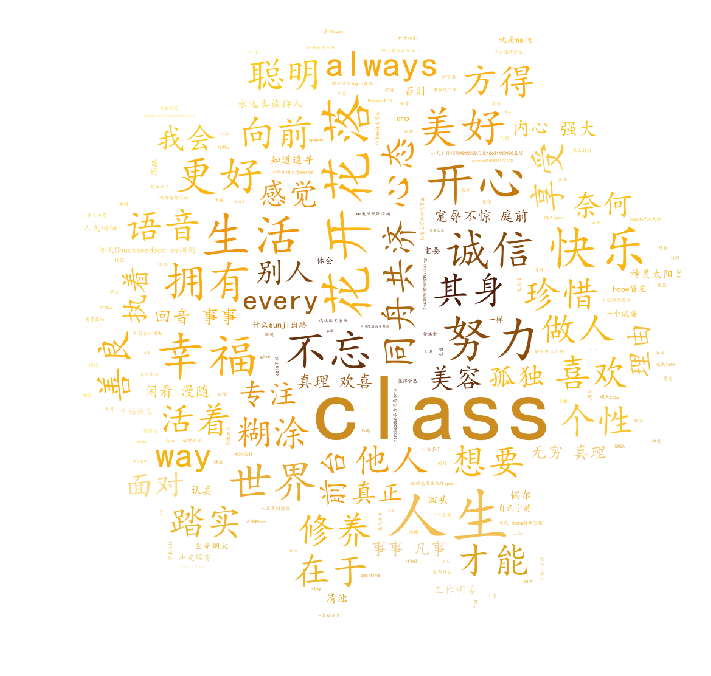

In [72]:
mask = np.array(Image.open('flower.jpg'))            # 词云的背景，大家可以自由发挥
wordcloud2 = WordCloud(font_path='simkai.ttf',
                       background_color='white',
                       max_words=200,
                       mask=mask,
                       margin=15)
wordcloud2.generate(signatures)
imageColors = ImageColorGenerator(mask)
plt.figure(figsize=(8,5), dpi=160)
plt.imshow(wordcloud2.recolor(color_func=imageColors))
plt.axis("off")
plt.show()
wordcloud2.to_file("signatures.jpg")

<img src="images/0003.png" width=400>

#### (3) 情感分布图

No handles with labels found to put in legend.


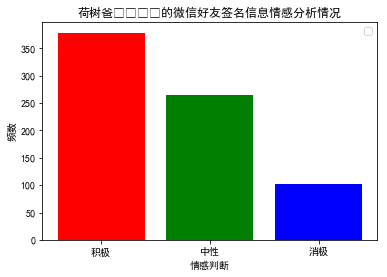

In [73]:
countPositive = len(list(filter(lambda x: x>0.66, emotions)))  # 大于 0.66 为积极
countNegative = len(list(filter(lambda x: x<0.33, emotions)))  # 小于 0.33 为消极
countNeutral  = len(list(filter(lambda x: x>=0.33 and x<=0.66, emotions)))
labels = ['积极', '中性', '消极']
values =(countPositive, countNeutral, countNegative)
plt.rcParams['font.sans-serif'] = ['simHei']
plt.rcParams['axes.unicode_minus'] = False
plt.xlabel("情感判断")
plt.ylabel("频数")
plt.xticks(range(3), labels)
plt.legend(loc='upper right')
plt.bar(range(3), values, color='rgb')
plt.title('{}的微信好友签名信息情感分析情况'.format(friends[0]['NickName']))
plt.show()

<img src="images/0004.png" width=400>

#### (4) 数据分析

- 好友积极乐观占多数

## 2.8 位置分析

#### (1) 组合成DataFrame

In [74]:
def getAttr(friends, key):
    return list(map(lambda x: x.get(key), friends))

In [75]:
nicknames = getAttr(friends, "NickName")
provinces = getAttr(friends, "Province")
cities = getAttr(friends, "City")

userDF = pd.DataFrame(
    {"NickName": nicknames,
     "Province": provinces,
     "City": cities})
userDF

,NickName,Province,City
0,荷树爸🌴🌼,上海,杨浦
1,艾辉林,上海,闸北
2,ME,England,London
3,烟波浩渺,,
4,馨怡花园业主联盟,,
5,zhy,广东,广州
6,老黄,,
7,Paul ZHU,,
8,国宝林-山东高速,山东,青岛
9,路人甲,上海,长宁


#### (2) 分组
- groupby

In [76]:
usersGroup = userDF.groupby('Province', as_index=True)['Province'].count().sort_values()
del(usersGroup[''])
usersGroup

Province
Tyrol                1
New South Wales      1
New York             1
North                1
Ontario              1
Osaka                1
Others               1
Rio Gallegos         1
Naples               1
Sham Shui Po         1
Umm al Qaiwain       1
Utrecht              1
Venice               1
Vorarlberg           1
Washington           1
云南                   1
台湾                   1
Tasmania             1
Maykop               1
Offaly               1
Lausanne             1
Malacca              1
Bat Dambang          1
Dubayy               1
Barcelona            1
Georgia              1
Auckland             1
Illinois             1
Kerry                1
Ansbach              1
                  ... 
Pennsylvania         2
Paris                2
宁夏                   2
North Carolina       2
California           2
内蒙古                  3
吉林                   3
广西                   4
甘肃                   5
山西                   5
黑龙江                  5
河北                   6
辽宁

#### (3) 绘图 —— Map

- 只筛选出中国地区

In [77]:
usersList = [list(z) for z in zip(usersGroup.index, usersGroup.values) if u'\u4e00' <= z[0][0] <= u'\u9fff']
usersList

[['云南', 1],
 ['台湾', 1],
 ['澳门', 2],
 ['海南', 2],
 ['香港', 2],
 ['宁夏', 2],
 ['内蒙古', 3],
 ['吉林', 3],
 ['广西', 4],
 ['甘肃', 5],
 ['山西', 5],
 ['黑龙江', 5],
 ['河北', 6],
 ['辽宁', 7],
 ['天津', 8],
 ['江西', 8],
 ['河南', 8],
 ['重庆', 8],
 ['贵州', 9],
 ['山东', 13],
 ['陕西', 15],
 ['四川', 16],
 ['安徽', 17],
 ['湖南', 17],
 ['福建', 23],
 ['广东', 26],
 ['湖北', 27],
 ['浙江', 53],
 ['北京', 71],
 ['江苏', 114],
 ['上海', 554]]

#### (4) Bug
- 这里 add() 方法传入 usersList，会渲染出没有颜色的灰底图
- 而把 usersList 的结果直接传入，则可以得到正确的结果
- 。。。

In [81]:
mapPos = (
    Map()
    .add("微信", 
    [['云南', 1],
 ['台湾', 1],
 ['澳门', 2],
 ['海南', 2],
 ['香港', 2],
 ['宁夏', 2],
 ['内蒙古', 3],
 ['吉林', 3],
 ['广西', 4],
 ['甘肃', 5],
 ['山西', 5],
 ['黑龙江', 5],
 ['河北', 6],
 ['辽宁', 7],
 ['天津', 8],
 ['江西', 8],
 ['河南', 8],
 ['重庆', 8],
 ['贵州', 9],
 ['山东', 13],
 ['陕西', 15],
 ['四川', 16],
 ['安徽', 17],
 ['湖南', 17],
 ['福建', 23],
 ['广东', 26],
 ['湖北', 27],
 ['浙江', 53],
 ['北京', 71],
 ['江苏', 114],
 ['上海', 554]], 
         "china")
    .set_global_opts(
        title_opts=opts.TitleOpts(title="微信好友省份分布"),
        visualmap_opts=opts.VisualMapOpts(max_=200))
)

mapPos.render_notebook()

LOG OUT!


<img src="images/0005.png" width=800>

## 案例分析(1) 结束